<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Sale Price Prediction Model

> Authors: Djuwita Carney

---

## Objective
To make a prediction of housing price in Ames, Iowa as a function of many aspects of housing conditions

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
cd \Users\carne\Documents\Djuwita_DSI\Submissions\project_2

C:\Users\carne\Documents\Djuwita_DSI\Submissions\project_2


## Read Data
The `train` dataset consists of comprehensive housing data in Ames Iowa 

In [3]:
cd/djuwita/submissions/Project_2

[WinError 3] The system cannot find the path specified: '/djuwita/submissions/Project_2'
C:\Users\carne\Documents\Djuwita_DSI\Submissions\project_2


In [4]:
# Read in the dummy_train data in the data folder in this repository. dummy_train data is the clean train data with dummy columns for the qualitative variables
dummy_train = pd.read_csv('./datasets/dummy_train.csv')

In [5]:
# Read in the clean_test file. This is the file with clean test data data with dummy columns for the qualitative variables.
test = pd.read_csv('./datasets/clean_test.csv')

# Prepare regression parameters

In [6]:
# Identify common variables between Train and Test data for fitting to be possible

dummy_train_cols = dummy_train.columns
test_cols = test.columns

common_cols = dummy_train_cols.intersection(test_cols)
common_cols

Index(['PID', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF',
       ...
       'Paved Drive_Y', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=230)

In [7]:
test = test.loc[:, test.columns.isin(list(common_cols))]

In [8]:
features = common_cols
X_train = dummy_train[features]
y_train = dummy_train['SalePrice']
X_test = test

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test = lr.predict(X_test)

In [11]:
## Lasso and Ridge

In [12]:
# Instantiate.
ss = StandardScaler()

# Fit.
X_train_sc = ss.fit_transform(X_train)

# Fit.
X_test_sc = ss.fit_transform(X_test)

In [13]:
lasso = LassoCV(n_alphas=100)

In [14]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Ridge Model Fitting and Evaluation
---

In [15]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [16]:
ridge.score(X_train_sc, y_train)

0.912186276660647

In [17]:
ridge.score(X_test_sc, y_test)

0.9892867667989035

In [18]:
pred = ridge.predict(X_test_sc)

In [19]:
r2_score(y_test, pred)

0.9892867667989034

In [20]:
residuals_ridge = y_test - pred

## Lasso Model Fitting and Evaluation

In [21]:
lasso.fit(X_train_sc, y_train)

C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [22]:
lasso.score(X_train_sc, y_train)

0.9009443863925833

In [23]:
lasso.score(X_test_sc, y_test)

0.9728633230122613

In [24]:
pred = lasso.predict(X_test_sc)

In [25]:
r2_score(y_test, pred)

0.9728633230122614

In [26]:
residuals_lasso = y_test - pred

Text(0, 0.5, 'Ridge_residuals')

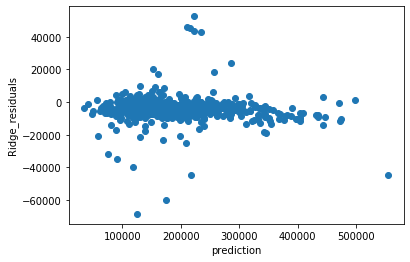

In [27]:
plt.scatter(pred, residuals_ridge)
plt.xlabel('prediction')
plt.ylabel('Ridge_residuals')

In [28]:
residuals_lasso = y_test - pred

Text(0, 0.5, 'Lasso_residuals')

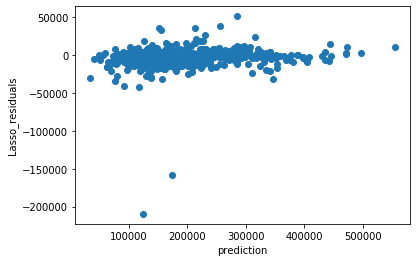

In [29]:
plt.scatter(pred, residuals_lasso)
plt.xlabel('prediction')
plt.ylabel('Lasso_residuals')

## Overall Lasso predictions is better than ridge's. There are less outliers, howevr the residuals for those outliers are larger than those of Ridge's. The Prediction quality of Lasso is slightly better,

## Cross validation
---

Use `cross_val_score` to evaluate all models.

In [30]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8670311797795205

In [31]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.872389225656229

In [32]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.8704616922130762

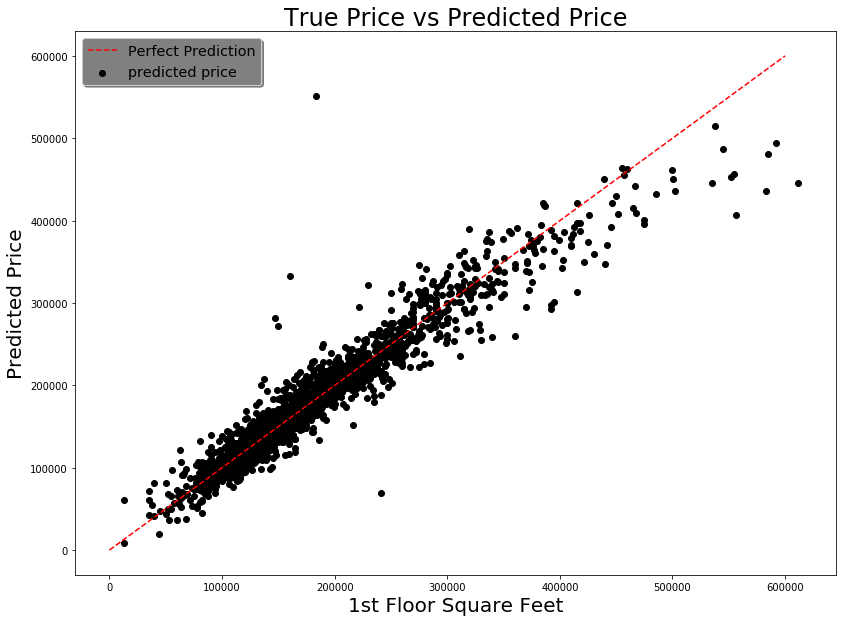

In [33]:
# A:

# Plot between true price and the predicted price
#
y0 = [0,600000] # this line represents an ideal prediction line
y1 = [0,600000]

f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
ax.plot(y0, y1, 'k--', label='Perfect Prediction', color = 'red')
ax.scatter(y_train,y_pred, label ='predicted price',
            color = 'black')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.xlabel('1st Floor Square Feet', fontsize = 20)
plt.ylabel('Predicted Price', fontsize = 20)

# Put a background color on the legend.
legend.get_frame().set_facecolor('grey')

# Create a title.
plt.title('True Price vs Predicted Price', fontsize = 24);

In [34]:
# This will produce a summary table where we can see how each prediction variable affects he SalePrice

import statsmodels.api as sm
lr2 = sm.OLS(y_train, X_train).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     93.68
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:40:47   Log-Likelihood:                -23527.
No. Observations:                2050   AIC:                         4.747e+04
Df Residuals:                    1842   BIC:                         4.864e+04
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PID                   4.555e-06   8.63e-06      0.528      0.598   -1.24e-05    2.15e-05
Lot Area                 0.4509      0.130      3.467      0.001       0.196       0.706
Overall Qual          8214.8453    868.374      9.460      0.000    6511.744    9917.947
Year Built              94.9661     64.079      1.482      0.139     -30.709     220.641
Year Remod/Add         197.8072     46.981      4.210      0.000     105.666     289.948
Mas Vnr Area            15.0466      5.369      2.803      0.005       4.518      25.576
BsmtFin SF 1            -4.2979      6.523     -0.659      0.510     -17.092       8.496
Bsmt Unf SF            -10.6762      6.611     -1.615      0.107     -23.642       2.290
Total Bsmt SF           19.2921      7.138      2.703      0.007       5.293      33.291
1st Flr SF               8.5540     13.678      0.625      0.532     -18.273      35.381
2nd Flr SF              19.1920     12.954      1.482      0.139      -6.214      44.598
Gr Liv Area             28.4488     13.444      2.116      0.034       2.081      54.816
Bsmt Full Bath        6310.3163   1601.548      3.940      0.000    3169.276    9451.356
Full Bath             6010.4323   1860.747      3.230      0.001    2361.037    9659.827
Half Bath             1988.8987   1779.204      1.118      0.264   -1500.571    5478.368
Bedroom AbvGr         -776.7546   1145.883     -0.678      0.498   -3024.121    1470.612
Kitchen AbvGr        -1.118e+04   5351.937     -2.088      0.037   -2.17e+04    -680.003
TotRms AbvGrd          566.6477    806.470      0.703      0.482   -1015.044    2148.339
Fireplaces            5094.7517   1197.538      4.254      0.000    2746.078    7443.426
Garage Yr Blt          -74.3183     49.175     -1.511      0.131    -170.762      22.126
Garage Cars           7530.6587   2031.424      3.707      0.000    3546.523    1.15e+04
Garage Area              9.2538      7.127      1.298      0.194      -4.724      23.232
Wood Deck SF             8.1267      5.085      1.598      0.110      -1.847      18.100
Open Porch SF          -10.9656      9.925     -1.105      0.269     -30.431       8.500
Enclosed Porch           7.5313     11.089      0.679      0.497     -14.217      29.280
Screen Porch            68.9612     10.630      6.487      0.000      48.113      89.809
Street_Grvl          -6.266e+04   1.65e+04     -3.801      0.000    -9.5e+04   -3.03e+04
Street_Pave          -5.586e+04   1.63e+04     -3.417      0.001   -8.79e+04   -2.38e+04
Lot Shape_IR1         -2.34e+04   7965.851     -2.937      0.003    -3.9e+04   -7771.991
Lot Shape_IR2        -1.966e+04   8524.010     -2.307      0.021   -3.64e+04   -2947.078
Lot Shape_IR3        -5.246e+04   1.05e+04     -4.978      0.000   -7.31e+04   -3.18e+04
Lot Shape_Reg        -2.299e+04   7990.505     -2.877    

In [93]:
# Read in test file. to get the Id.
test_org = pd.read_csv('./datasets/test.csv')

In [94]:
id_number = test_org['Id']
id_number = pd.DataFrame(id_number)
id_number.dropna()
id_number.shape

(879, 1)

In [95]:
# Save prediction to csv file for submission
pred = pd.DataFrame(pred)
frame = [id_number, pred]
result = pd.concat(frame, axis = 1)
result.columns = ['Id','SalePrice']

result.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\result.csv', index = False)